In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

data_folder_path = Path().resolve().parent / "__temp_bots_Jun07_20h55m54.7s"
app_name = "network_pd.csv"

In [3]:
df = pl.read_csv(data_folder_path / app_name)
df.head()

participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,participant.mturk_worker_id,participant.mturk_assignment_id,participant.payoff,player.id_in_group,player.role,player.payoff,player.action,player.time_out,player.current_payoff,player.neighbor_actions,player.neighbor_payoffs,player.highest_action,player.show_payoffs,group.id_in_subsession,group.dicision_start_time,group.show_payoffs,subsession.round_number,session.code,session.label,session.mturk_HITId,session.mturk_HITGroupId,session.comment,session.is_demo
i64,str,str,i64,i64,i64,str,str,str,i64,str,str,f64,i64,str,f64,i64,i64,i64,str,str,i64,i64,i64,f64,i64,i64,str,str,str,str,str,i64
1,"""wvqv9ssi""",null,1,26,25,"""network_pd""","""ResultsWaitPage""","""2025-06-07 11:55:25.709553""",1,null,null,68.0,1,null,12.0,1,0,12,"""1,1,0,1""","""16,12,20,12""",0,0,2,1.7493e9,0,1,"""9lnacnpl""",null,null,null,null,0
2,"""0uinnsiq""",null,1,26,25,"""network_pd""","""ResultsWaitPage""","""2025-06-07 11:55:25.773619""",1,null,null,48.0,2,null,20.0,0,0,20,"""1,1,1,1""","""12,12,12,12""",0,0,2,1.7493e9,0,1,"""9lnacnpl""",null,null,null,null,0
3,"""or1s2fq0""",null,1,26,25,"""network_pd""","""ResultsWaitPage""","""2025-06-07 11:55:25.802580""",1,null,null,52.0,3,null,12.0,1,0,12,"""1,0,1,1""","""12,20,12,16""",0,0,2,1.7493e9,0,1,"""9lnacnpl""",null,null,null,null,0
4,"""kgpeivnr""",null,1,26,25,"""network_pd""","""ResultsWaitPage""","""2025-06-07 11:55:25.830962""",1,null,null,68.0,4,null,12.0,1,0,12,"""0,1,1,1""","""20,12,16,12""",0,0,2,1.7493e9,0,1,"""9lnacnpl""",null,null,null,null,0
5,"""u1bwq8z5""",null,1,26,25,"""network_pd""","""ResultsWaitPage""","""2025-06-07 11:55:25.860486""",1,null,null,52.0,5,null,16.0,1,0,16,"""1,1,1,1""","""12,12,12,12""",1,0,2,1.7493e9,0,1,"""9lnacnpl""",null,null,null,null,0


In [4]:
df.columns

['participant.id_in_session',
 'participant.code',
 'participant.label',
 'participant._is_bot',
 'participant._index_in_pages',
 'participant._max_page_index',
 'participant._current_app_name',
 'participant._current_page_name',
 'participant.time_started_utc',
 'participant.visited',
 'participant.mturk_worker_id',
 'participant.mturk_assignment_id',
 'participant.payoff',
 'player.id_in_group',
 'player.role',
 'player.payoff',
 'player.action',
 'player.time_out',
 'player.current_payoff',
 'player.neighbor_actions',
 'player.neighbor_payoffs',
 'player.highest_action',
 'player.show_payoffs',
 'group.id_in_subsession',
 'group.dicision_start_time',
 'group.show_payoffs',
 'subsession.round_number',
 'session.code',
 'session.label',
 'session.mturk_HITId',
 'session.mturk_HITGroupId',
 'session.comment',
 'session.is_demo']

<Axes: xlabel='sum_payoff', ylabel='Density'>

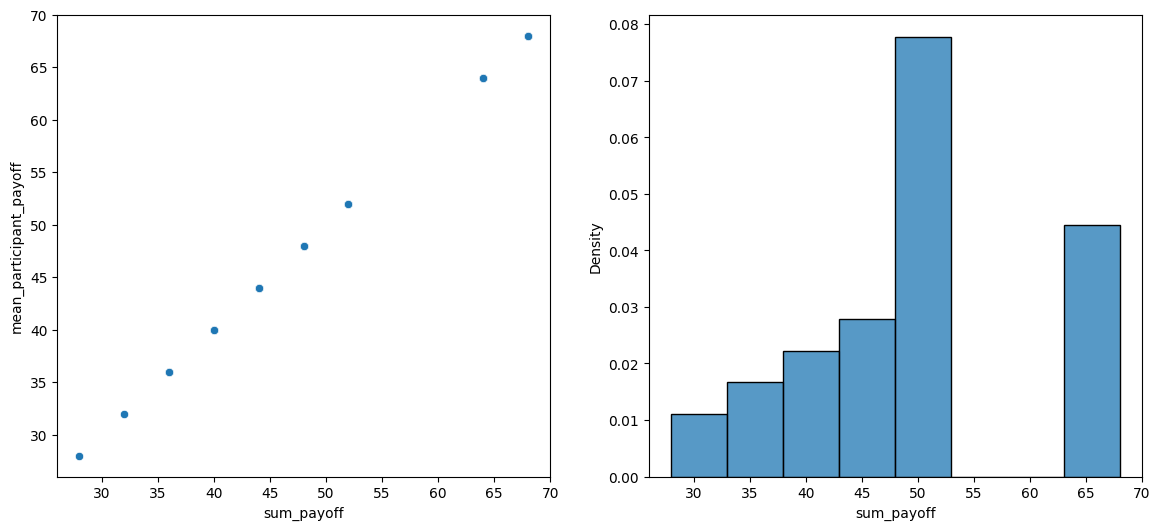

In [ ]:
# payoff distribution
plt_df = df.group_by("participant.id_in_session").agg(
    pl.col("player.payoff").sum().alias("sum_payoff"),
    pl.col("participant.payoff").mean().alias("mean_participant_payoff"),
)
# plt_df.glimpse()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(
    data=plt_df.to_pandas(),
    x="sum_payoff",
    y="mean_participant_payoff",
    ax=axes[0],
)
sns.histplot(
    plt_df.to_pandas(),
    x="sum_payoff",
    stat="density",
    ax=axes[1],
)